In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.7.0'

In [10]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [11]:
training_set = train_datagen.flow_from_directory('C:/Users/DELL/Desktop/dataset__/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/DELL/Desktop/dataset__/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1018 images belonging to 2 classes.
Found 268 images belonging to 2 classes.


In [12]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [13]:
from tensorflow.keras.regularizers import l2

In [14]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])
# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [16]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set,validation_data=test_set,epochs=15)

Epoch 1/15
32/32 [==============================] - 29s 877ms/step - loss: 0.8639 - accuracy: 0.6277 - val_loss: 0.6918 - val_accuracy: 0.7687
Epoch 2/15
32/32 [==============================] - 21s 642ms/step - loss: 0.6790 - accuracy: 0.7534 - val_loss: 0.6438 - val_accuracy: 0.8134
Epoch 3/15
32/32 [==============================] - 22s 684ms/step - loss: 0.5855 - accuracy: 0.7986 - val_loss: 0.5525 - val_accuracy: 0.8022
Epoch 4/15
32/32 [==============================] - 22s 692ms/step - loss: 0.5229 - accuracy: 0.8212 - val_loss: 0.4700 - val_accuracy: 0.8358
Epoch 5/15
32/32 [==============================] - 23s 722ms/step - loss: 0.6236 - accuracy: 0.7475 - val_loss: 0.4865 - val_accuracy: 0.8172
Epoch 6/15
32/32 [==============================] - 21s 670ms/step - loss: 0.4892 - accuracy: 0.8134 - val_loss: 0.4205 - val_accuracy: 0.8358
Epoch 7/15
32/32 [==============================] - 21s 659ms/step - loss: 0.4106 - accuracy: 0.8458 - val_loss: 0.3754 - val_accuracy: 0.8657

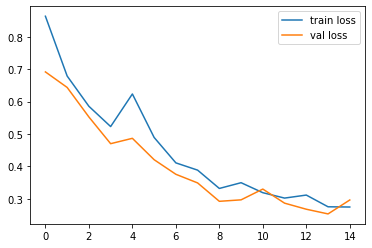

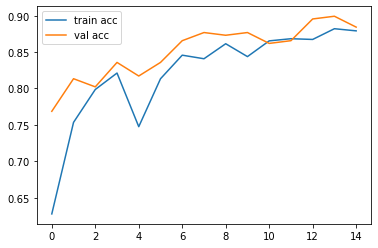

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('own_marine.h5')


In [19]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('own_marine.h5')


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              